In [129]:
# Подключим необходимые библиотеки

import matplotlib.pyplot as plt
import numpy as np

In [128]:
# Пропишем количество вершин и раундов

n = 8
cnt_rounds = 1000

In [127]:
# Также представим граф в виде списка смежности (1-индексация)
# и посчитаем количество исходящих ребер из каждой вершины.
# Также напишем вспомогательные массивы для получения буквы сайта и цвета для графика по номеру

graph = [
    [],
    [2, 3],
    [4, 5],
    [6, 7],
    [8, 1],
    [8, 1],
    [1],
    [1],
    [1]
]

out = [
    0, 2, 2, 2, 2, 2, 1, 1, 1
]

decode = ['', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
colors = plt.cm.viridis(np.linspace(0, 1, 9))

In [130]:
# Введем массив пересчета авторитетностей, заполним изначальное состояние каждого 
# сайта единицами

authority = []
for _ in range(cnt_rounds + 1):
    authority.append([0] * (n + 1))

for v in range(1, n + 1):
    authority[0][v] = 1

In [131]:
# Пересчитываем авторитетности для каждого раунда

for rnd in range(1, cnt_rounds + 1):
    for v in range(1, n + 1):
        for u in graph[v]:
            authority[rnd][u] += authority[rnd - 1][v] * (1 / out[v])

In [132]:
# Авторитетности сайтов после 1000-го раунда

for v in range(1, n + 1):
    print(f'Авторитетность сайта {decode[v]}: {round(authority[cnt_rounds][v], 2)}')

Авторитетность сайта A: 2.46
Авторитетность сайта B: 1.23
Авторитетность сайта C: 1.23
Авторитетность сайта D: 0.62
Авторитетность сайта E: 0.62
Авторитетность сайта F: 0.62
Авторитетность сайта G: 0.62
Авторитетность сайта H: 0.62


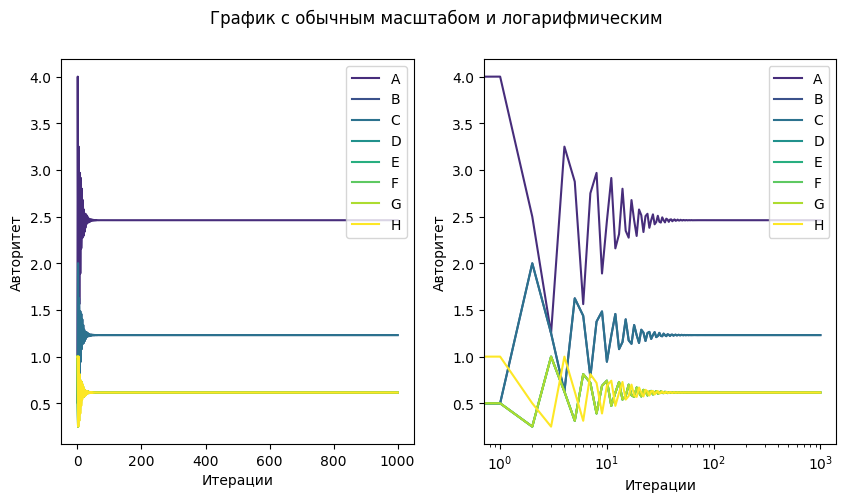

In [133]:
# Построим график изменения авторитетности с течением раундов голосования

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('График с обычным масштабом и логарифмическим')

for v in range(1, 9):
    axes[0].plot(range(0, cnt_rounds + 1), [row[v] for row in authority], label=decode[v], color=colors[v])
    
axes[0].set_xlabel('Итерации')
axes[0].set_ylabel('Авторитет')

axes[0].legend(loc='upper right')

for v in range(1, 9):
    axes[1].plot(range(0, cnt_rounds + 1), [row[v] for row in authority], label=decode[v], color=colors[v])

axes[1].set_xlabel('Итерации')
axes[1].set_ylabel('Авторитет')
axes[1].legend(loc='upper right')
axes[1].set_xscale('log')

plt.show()